## 1. Import packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## 2. Create Dummy Dataset

In [2]:
def getData(N, variance):
    pi = math.pi
    cos = math.cos
    sigma = math.sqrt(variance) #standard deviation
    X = np.random.rand(N, 1)
    mean = np.mean(X)
    noise = np.random.normal(mean, sigma, N)
    Y = []
    for x in X:   #next time try with polyval function
        y = cos(2*pi*x)
        Y.append(y)
    Y = Y + noise  #adding noise to the dummy dataset
    return [X,Y]

## 3. Define d degree polynomial function

In [3]:
def yFunc(coeffs, x):
    # this function gives an output c0 + c1x^1 + c2x^2, coeffs = [c0, c1, c2]
    polynomial = np.polynomial.polynomial.Polynomial(coeffs) 
    return polynomial(x)

## 4. Mean Square Error

In [4]:
def getMSE(N, actualList, predictedList):
    sum = 0
    for i in range(0,N):
        sum += (actualList[i] - predictedList[i])**2
    return sum/N

## 5. Calculate New coefficient using gradient descent

In [5]:
def calcNewCoeffs(N, randCoeffs, x, yActual, learningRate):
    yPredicted = [yFunc(randCoeffs, i) for i in x]
       
    partialCoeffs = [[] for j in range(len(randCoeffs))] 
    
    for x, ya, yp in list(zip(x, yActual, yPredicted)):  
        for i in range(len(randCoeffs)):
            partialCoeff = (x**i)*(ya - yp)
            partialCoeffs[i].append(partialCoeff)
            
    gradient = []
    newCoeffs = []
    
    for i in range(len(randCoeffs)):
        gradient.append(((-2) * sum(partialCoeffs[i]))/N)
        newCoeffs.append(randCoeffs[i] - (learningRate*gradient[i])) 
        
    return newCoeffs

## 6. Get the best fit for data by calculating new coefficients over 320 epochs

In [6]:
def fitData(N, newCoeffs, x, yActual, epochs, learningRate, variance):
    yPredicted = [yFunc(newCoeffs, i) for i in x]
#     losses = []  # To calculate the loss graph
    for i in range(epochs):
        newCoeffs = calcNewCoeffs(N, newCoeffs, x, yActual, learningRate)
        newCoeffs = np.asarray(newCoeffs).flatten()
#         yPredicted = [yFunc(newCoeffs, j) for j in x]  # To calculate the loss graph
#         losses.append(getMSE(N, yActual, yPredicted))  # To calculate the loss graph
    
    yPredicted = [yFunc(newCoeffs, i) for i in x]
    newMse = getMSE(N, yActual, yPredicted)
    
    largeDataset = getData(1000, variance)
    newX = largeDataset[0]
    newYActual = largeDataset[1]
    newYPredicted = [yFunc(newCoeffs, i) for i in newX]
    newMseOfLargeDataset = getMSE(N, newYActual, newYPredicted)
    
    Ein = newMse
    Eout = newMseOfLargeDataset
    
#     # To calculate the loss graph
#     plt.figure(figsize=(8, 4))
#     plt.plot(losses, 'b-', label = 'loss')
#     plt.title('Loss over '+ str(epochs) + ' iterations')
#     plt.legend(loc="lower right")
#     plt.xlabel('Iterations')
#     plt.ylabel('MSE')
#     plt.show()
    
    return newCoeffs, Ein, Eout

## 7. Get the Ein and Eout for each value of N, d, and variance

In [7]:
def experiment(N, d, variance):
    totalEin = []
    totalEout = []
    M = 50
    
    for i in range(M):
        dataset = getData(N, variance)
        randCoeffs = np.random.randint(-5, 5, size = d+1)        
        coeffs = randCoeffs 
        x = dataset[0]
        yActual = dataset[1]       
        epochs = 320
        learningRate = 0.01
        
        output = fitData(N, randCoeffs, x, yActual, epochs, learningRate, variance) 
        totalEin.append(output[1])
        totalEout.append(output[2])
        
        
#         # to plot the graph with new coefficients
#         yPredictedFirst = [yFunc(coeffs, i) for i in x]
#         yPredictedLast = [yFunc(output[0], i) for i in x]
        
#         plt.figure(figsize=(10, 6))
#         plt.scatter(x, yActual, color='green', label="Y actual")
#         plt.scatter(x, yPredictedFirst, color = 'red', label="Y predicted with random coeff")
#         plt.scatter(x, yPredictedLast, color = 'gray', label="Y predicted with predicted coeff")
#         plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.title("Before the Gradient descent vs After the Gradient descent")
#         plt.xlabel("X")
#         plt.ylabel("Y")
#         plt.show()
        
    EinAverage = sum(totalEin)/M
    EoutAverage = sum(totalEout)/M
    
    return (EinAverage, EoutAverage)

## 8. Let start with the Experiment!!! Here we can print all data and look at the values

In [40]:
print("N-----\t------d-------\t---------variance------\t-------(Ein, Eout)")
for N in [2, 5, 10, 20, 50, 100, 200]:
    for variance in [0.05, 0.2]:
        for d in [1, 2, 4, 8, 16, 32, 64]:
            result = experiment(N, d, variance)
            print(N, "-----\t------", d, "-------\t---------", variance, "------\t-------", (result[0], result[1]))

N-----	------d-------	---------variance------	-------(Ein, Eout)
2 -----	------ 1 -------	--------- 0.05 ------	------- (array([0.29141586]), array([1.3294955]))
2 -----	------ 2 -------	--------- 0.05 ------	------- (array([0.16895104]), array([2.0518442]))
2 -----	------ 4 -------	--------- 0.05 ------	------- (array([0.27245889]), array([2.39516108]))
2 -----	------ 8 -------	--------- 0.05 ------	------- (array([0.26665137]), array([7.31295101]))
2 -----	------ 16 -------	--------- 0.05 ------	------- (array([0.18399857]), array([8.07297061]))
2 -----	------ 32 -------	--------- 0.05 ------	------- (array([0.24323306]), array([6.07016654]))
2 -----	------ 64 -------	--------- 0.05 ------	------- (array([0.24577257]), array([12.58041204]))
2 -----	------ 1 -------	--------- 0.2 ------	------- (array([0.32120821]), array([1.66305168]))
2 -----	------ 2 -------	--------- 0.2 ------	------- (array([0.18620295]), array([2.93811435]))
2 -----	------ 4 -------	--------- 0.2 ------	-------

100 -----	------ 64 -------	--------- 0.2 ------	------- (array([0.92334881]), array([1.47513068]))
200 -----	------ 1 -------	--------- 0.05 ------	------- (array([0.70624728]), array([0.72766556]))
200 -----	------ 2 -------	--------- 0.05 ------	------- (array([0.77987721]), array([0.7757058]))
200 -----	------ 4 -------	--------- 0.05 ------	------- (array([0.67087735]), array([0.66824681]))
200 -----	------ 8 -------	--------- 0.05 ------	------- (array([0.70974671]), array([0.73149085]))
200 -----	------ 16 -------	--------- 0.05 ------	------- (array([0.68241716]), array([0.68685218]))
200 -----	------ 32 -------	--------- 0.05 ------	------- (array([0.6941508]), array([0.78510147]))
200 -----	------ 64 -------	--------- 0.05 ------	------- (array([0.73407491]), array([0.79179935]))
200 -----	------ 1 -------	--------- 0.2 ------	------- (array([0.93809505]), array([0.95347204]))
200 -----	------ 2 -------	--------- 0.2 ------	------- (array([0.84792334]), array([0.88619552]))
2

## Observation of Ein/Eout-Degree D relation for different values of N

Ein for variance 0.05  is  [array([0.30037561]), array([0.29032172]), array([0.1793584]), array([0.13851073]), array([0.20685247]), array([0.16786694]), array([0.25826212])]
Eout for variance 0.05  is  [array([1.02584954]), array([1.35697238]), array([2.55615794]), array([3.18828089]), array([6.1512759]), array([31.29894206]), array([34.81184712])]
Ein for variance 0.2  is  [array([0.34092742]), array([0.42896754]), array([0.19411305]), array([0.31072852]), array([0.20462026]), array([0.30862917]), array([0.19768392])]
Eout for variance 0.2  is  [array([1.85427908]), array([1.91710366]), array([6.47955747]), array([5.089663]), array([4.11157892]), array([13.51578716]), array([17.73139672])]


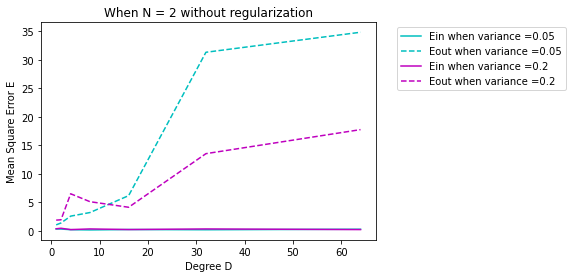

Ein for variance 0.05  is  [array([0.72125587]), array([0.7541942]), array([0.59407389]), array([0.61682561]), array([0.62539751]), array([0.64035147]), array([0.75660088])]
Eout for variance 0.05  is  [array([0.87126476]), array([0.91756826]), array([0.82726492]), array([0.88994544]), array([0.84774135]), array([2.8472673]), array([6.60120429])]
Ein for variance 0.2  is  [array([0.89869391]), array([0.90863352]), array([0.77982274]), array([0.66579774]), array([0.87324845]), array([0.86239038]), array([0.96538791])]
Eout for variance 0.2  is  [array([1.02694368]), array([1.15413875]), array([0.9429128]), array([0.9297017]), array([1.15744805]), array([3.40720118]), array([4.9215028])]


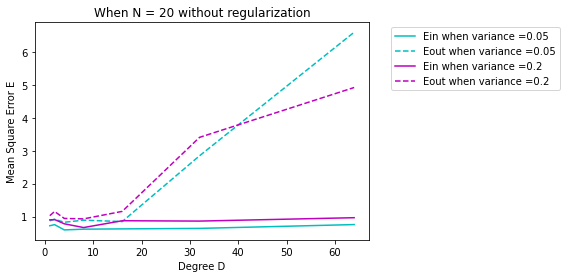

Ein for variance 0.05  is  [array([0.77710253]), array([0.77737501]), array([0.7727601]), array([0.60786025]), array([0.71600801]), array([0.74245143]), array([0.7897247])]
Eout for variance 0.05  is  [array([0.78913655]), array([0.76111184]), array([0.79980286]), array([0.62190487]), array([0.73042044]), array([0.79820272]), array([0.8430832])]
Ein for variance 0.2  is  [array([0.97828593]), array([0.8599613]), array([0.86016886]), array([0.87279444]), array([0.81261496]), array([0.9061878]), array([0.92944462])]
Eout for variance 0.2  is  [array([0.98748943]), array([0.86506712]), array([0.89337911]), array([0.90563258]), array([0.8110837]), array([1.00021823]), array([1.01805996])]


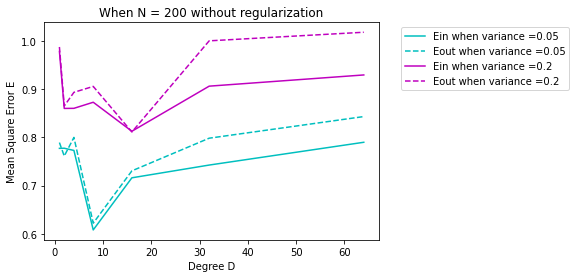

In [8]:
D = [1, 2, 4, 8, 16, 32, 64]
color = ['c-', 'c--', 'm-', 'm--']

for N in [2, 20, 200]:
    i = 0
    for variance in [0.05, 0.2]:
        Ein, Eout = [], []
        for d in D:
            result = experiment(N, d, variance)
            Ein.append(result[0])
            Eout.append(result[1])
        print("Ein for variance", variance, " is ", Ein)
        print("Eout for variance", variance, " is ", Eout)
        plt.plot(D, Ein, color[i], label="Ein when variance =%s"%(variance))
        plt.plot(D, Eout, color[i+1], label="Eout when variance =%s"%(variance))
        i = i + 2  
    plt.title("When N = %s without regularization"%(N))
    plt.xlabel("Degree D")
    plt.ylabel("Mean Square Error E")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


## Observation of Ein/Eout-N relation for different values of Degree D

Ein [array([0.23236742]), array([0.55796464]), array([0.89778517]), array([0.64303627]), array([0.48608442]), array([0.7372171]), array([0.6944289])]
Eout [array([0.31173769]), array([0.85480579]), array([0.51756639]), array([0.62130986]), array([0.705113]), array([0.70371245]), array([0.70443439])]
Ein [array([0.35613174]), array([0.19949518]), array([0.81546264]), array([0.7351669]), array([0.51627542]), array([0.79059551]), array([1.31936448])]
Eout [array([0.72997431]), array([3.46456468]), array([1.00516686]), array([0.88156638]), array([0.85459692]), array([0.87703714]), array([1.28868427])]


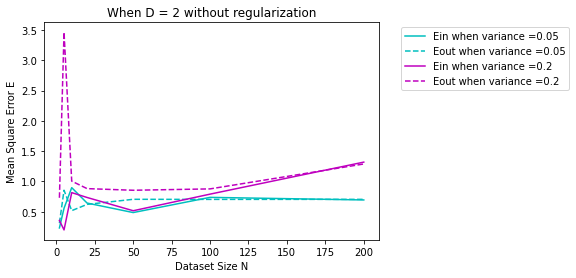

Ein [array([0.08735563]), array([0.07856054]), array([0.21923075]), array([1.32659767]), array([0.32648636]), array([1.23543962]), array([1.31805105])]
Eout [array([0.50836241]), array([7.45063778]), array([0.29000279]), array([1.23653092]), array([0.31101437]), array([1.34582869]), array([1.4493946])]
Ein [array([0.92881149]), array([0.40389926]), array([0.78498066]), array([0.77736872]), array([0.58926087]), array([0.39925594]), array([0.67532902])]
Eout [array([0.47828668]), array([2.48176807]), array([1.21373765]), array([0.8169248]), array([0.98487323]), array([0.37512891]), array([0.65768689])]


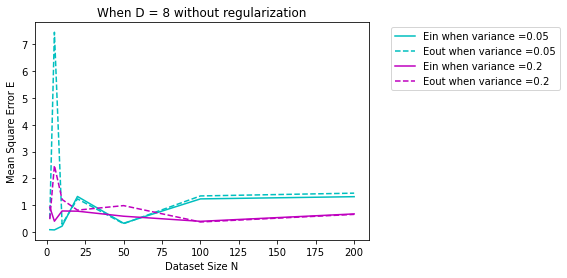

Ein [array([0.41063972]), array([0.15315139]), array([0.62935059]), array([1.01773271]), array([1.12933744]), array([0.60746896]), array([1.14690756])]
Eout [array([15.98597332]), array([0.70709502]), array([0.90040795]), array([8.50838051]), array([31.17658605]), array([0.62114606]), array([1.10636197])]
Ein [array([0.06633382]), array([0.3133557]), array([1.14375716]), array([0.68210232]), array([0.74294395]), array([1.04745482]), array([0.96635844])]
Eout [array([0.61953419]), array([0.94919579]), array([99.99423612]), array([1.23758961]), array([7.63382257]), array([1.70068809]), array([0.84350743])]


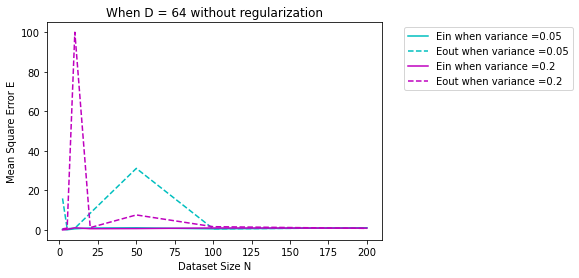

In [28]:
N = [2, 5, 10, 20, 50, 100, 200]
color = ['c-', 'c--', 'm-', 'm--']

for D in [2, 8, 64]:
    i = 0
    for variance in [0.05, 0.2]:
        Ein, Eout = [], []
        for n in N:
            result = experiment(n, D, variance)
            Ein.append(result[0])
            Eout.append(result[1])
        print("Ein", Ein)
        print("Eout", Eout)
        plt.plot(N, Ein, color[i], label="Ein when variance =%s"%(variance))
        plt.plot(N, Eout, color[i+1], label="Eout when variance =%s"%(variance))
        i = i + 2  
    plt.title("When D = %s without regularization"%(D))
    plt.xlabel("Dataset Size N")
    plt.ylabel("Mean Square Error E")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()